# Project: Data Wrangling WeRateDogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering The Data</a></li>
<li><a href="#access">Accessing The Data</a></li>
<li><a href="#cleaning">Cleaning The Data</a>
<li><a href="#analizing">Analizing and Visualizing</a>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="gathering"></a>
# Gathering The Data

I parse my library needed in each task so it will easier to know what kind library needed from that task.
<ul>
<li><a href="#first">First Data: Get Data Twitter Archive</a></li>
<li><a href="#second">Second Data: Get Data Tweet Image Prediction</a></li>
<li>Third Data: Accessing The Data
    <ul>
        <li><a href="#configure">Configure Twitter Account</a></li>
        <li><a href="#getdatathird">Get Data Twitter with API & JSON</a></li>
    </ul>
</li>
<li><a href="#conclusiongathering">Conclusion</a></li>
<ul>

<a id="first"></a>
#### 1. Get Data Twitter Archive

Todo:
1. Import library needed
2. Read <b>twitter_archive_enhanced.csv</b> from the same folder
3. Make sure that data has been read correctly
    - print head

In [1]:
import pandas as pd

In [2]:
twitter_archive_df = pd.read_csv('data_udacity/twitter-archive-enhanced.csv')
twitter_archive_df = twitter_archive_df.sort_values('timestamp')
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


<a id="second"></a>
#### 2. Get Data Tweet Image Prediction

Todo:
1. Import library needed
2. Read <b>image-predictions.tsv</b> from Udacity's server that can be access from <i> https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv </i>
3. Make sure that data has been read correctly
    - print head
    - describe domain knowledge about the data

In [3]:
import requests

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('data_udacity/image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
#Read TSV file
image_prediction_df = pd.read_csv('data_udacity/image-predictions.tsv', sep='\t' )
image_prediction_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### The description:
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
- etc.

<a id="configure"></a>
#### 3. Configure Twitter Account

Todo:
1. Import library needed
2. Declare twitter configuration with consumer_key, consumer_secret, access_token, and access_secret 
3. Make configuration

In [6]:
import tweepy

In [7]:
# for security reasons, I save my configuration in csv
twitter_configuration = pd.read_csv("twitter_configuration.csv")

In [8]:
try:
    auth = tweepy.OAuthHandler(twitter_configuration.consumer_key[0], twitter_configuration.consumer_secret[0])
    auth.set_access_token(twitter_configuration.access_token[0], twitter_configuration.access_secret[0])
except tweepy.TweepError as t:
    print(t.message)
    
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

<a id="getdatathird"></a>
#### 4. Get Data Twitter with API & JSON

Todo:
1. Import library needed (if not exist before)
2. Get twitter data in JSON by id from file point 1
    - add data JSON from a list
    - add ids data that we can't find that with API
    - calculate the number id we wan to looking for
    - calculate number succes and fail data we looking for
    - save data tweets in txt file so we can accsess that many time
3. Read and save tweets data in dataframe so we can access in our notebook
4. Make sure that data has been read correctly
    - print head

In [9]:
import json
from timeit import default_timer as timer

In [10]:
tweets = []
ids_not_found_tweet = []
ids_fail_get_tweet = []
num_tweet_id = len(twitter_archive_df.tweet_id)
num_succes_get_data = 0
num_fail_get_data = 0

start = timer()
for tweet_id in twitter_archive_df.tweet_id:
    try:
        temp = api.get_status(tweet_id)._json
        tweets.append({'tweet_id':temp['id'],
                       'favorite_count':temp['favorite_count'],
                       'favorited':temp['favorited'],
                       'retweet_count':temp['retweet_count'],
                       'retweeted':temp['retweeted']})
        num_succes_get_data += 1
        print('{} : done, {}/{}'.format(tweet_id, num_succes_get_data, num_tweet_id))
    except tweepy.TweepError as t:
        num_fail_get_data += 1
        if (t.args[0][0]['message'] == 'No status found with that ID.'):
            ids_not_found_tweet.append(tweet_id)
        else:
            ids_fail_get_tweet.append(tweet_id)
        print('{} : {}, total fail= {}'.format(tweet_id, t, num_fail_get_data))

end = timer()
print("The time we need to get JSON file: {} second".format(end - start))

In [11]:
print("Success to get {} data, and fail to get {} data (no_tweet: {}, just fail: {}), from total {} data."\
      .format(num_succes_get_data, num_fail_get_data,\
             len(ids_not_found_tweet), len(ids_fail_get_tweet),\
             num_tweet_id))

In [12]:
json.dump(tweets,open('data_generated/tweets.txt', 'w', encoding="utf8"), ensure_ascii=False, indent=4)
print('Success save the json file')

In [13]:
# read json file into dataframe
with open('data_generated/tweets.txt','r') as f:
    data = json.load(f)

scrapped_tweet_df = pd.DataFrame(data)
scrapped_tweet_df.head(2)

,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,2498,False,493,False,666020888022790149
1,124,False,46,False,666029285002620928


<a id="conclusiongathering"></a>
###### Conclusion:
- We get the third data
- 21 data from tweet_id are failed to get from tweet API because the id is not found, the twitter must be deleted
- We get first data from file that we save in same folder, second data from Udacity's server, and third data from Twitter API
    - After see tweet_json.txt from Udacity, I decide to get some column (not all column) because another column has been save in first data, and some cols not need yet (like column user)
- Because twitter have range limit time, so we need extra time (because of sleep) to get all data. In this project we need 2010 second

<a id="access"></a>
# Accessing The Data 

For now, we have 3 data: <b> twitter_archive_df, image_prediction_df, and scrapped_tweet_df </b>.
<br>
Todo in accessing data:
<ol>
<li><a href="#length">Check length of data</a></li>
<li><a href="#type">Check the type of data</a></li>
<li><a href="#value">Check the value of data</a></li>
<li><a href="#missing">Check missing value of data</a></li>
<li><a href="#describe">Check stat describe data</a></li>
<li><a href="#issue">Founded Issues</a></li>
<ol>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

<a id="length"></a>
##### 1. Check length of data

In [15]:
def print_length(name, data_frame):
    print("The length of {} is {}".format(name, len(data_frame)))

In [16]:
print_length('twitter_archive_df', twitter_archive_df)
print_length('image_prediction_df', image_prediction_df)
print_length('scrapped_tweet_df', scrapped_tweet_df)

The length of twitter_archive_df is 2356
The length of image_prediction_df is 2075
The length of scrapped_tweet_df is 2335


From that data we get info that twitter_archive_df has different length with scrapped_tweet_df because we failed to get 22 data from twitter. We can delete some row in data so we will have the same length in each table.

<a id="type"></a>
##### 2. Check the type of data

In [17]:
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [18]:
image_prediction_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [19]:
scrapped_tweet_df.dtypes

favorite_count    int64
favorited          bool
retweet_count     int64
retweeted          bool
tweet_id          int64
dtype: object

Object in the data type mean string, we not have some problem in there except timestamp. It must be date

<a id="value"></a>
#### 3. Check the value of data

In [20]:
twitter_archive_df.name.value_counts().head()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Name: name, dtype: int64

There is 5 sorted dog name with the biggest total value. We find that "None" is typically missing data, and I assumed that "a" also a missing data, so we must find and uniformly all missing data value in each label.

In [21]:
twitter_archive_df.retweeted_status_id.value_counts().head()

7.757333e+17    1
8.001414e+17    1
8.174239e+17    1
6.742918e+17    1
6.833919e+17    1
Name: retweeted_status_id, dtype: int64

We only need original tweet (not retweeted by another tweet), so we must drop row that retweeted_status_id doesn't missing

In [22]:
scrapped_tweet_df.retweeted.value_counts()

False    2335
Name: retweeted, dtype: int64

Retweeted indicates whether this Tweet has been Retweeted by the authenticating user, because all value are false so this column be not informatif anymore.

In [23]:
twitter_archive_df.duplicated(['tweet_id']).sum()

0

In [24]:
twitter_archive_df.duplicated(['expanded_urls']).sum()

137

In [25]:
twitter_archive_df[twitter_archive_df.duplicated(['expanded_urls'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1914,674330906434379776,6.658147e+17,1.637468e+07,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1895,674742531037511680,6.747400e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is being demoted to a 9/10 for not we...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After some outrage from the crowd. Bubbles is ...,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
1774,678023323247357953,6.780211e+17,4.196984e+09,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After getting lost in Reese's eyes for several...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [26]:
twitter_archive_df[twitter_archive_df.duplicated(['expanded_urls'])].expanded_urls.value_counts()

https://twitter.com/dog_rates/status/810254108431155201/photo/1                                                                                                                                                                                                                                              1
https://twitter.com/dog_rates/status/844704788403113984/photo/1                                                                                                                                                                                                                                              1
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                                                              1
https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rat

In [27]:
twitter_archive_df.query("expanded_urls == 'https://twitter.com/dog_rates/status/767754930266464257/photo/1'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
837,767754930266464257,NaN,NaN,2016-08-22 16:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Philbert. His toilet broke and he does...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None
558,803321560782307329,NaN,NaN,2016-11-28 19:35:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Philbert. His toilet br...,7.677549e+17,4.196984e+09,2016-08-22 16:06:54 +0000,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None


There are some images that duplicated, we must re-check are they are have same value in each cols (except the id, because we don't have any duplicate tweet id)

In [28]:
scrapped_tweet_df.favorited.value_counts()

False    2335
Name: favorited, dtype: int64

retweeted and favorited data only have 1 value, so it is not important anymore, we must to drop it.

In [29]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

To make the data more clear, we need to change source cols value

<a id="missing"></a>
##### 4. Check missing value of data

list function name: <br>
<a id="get_missing_value_percentage">get_missing_value_percentage</a> <br>

In [30]:
def get_missing_value_percentage(data_frame):
    data_missing = data_frame.isna()
    num_data_missing = data_missing.sum()
    num_data = len(data_frame)
    return (num_data_missing * 100)/num_data

In [31]:
get_missing_value_percentage(twitter_archive_df)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [32]:
get_missing_value_percentage(image_prediction_df)

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [33]:
get_missing_value_percentage(scrapped_tweet_df)

favorite_count    0.0
favorited         0.0
retweet_count     0.0
retweeted         0.0
tweet_id          0.0
dtype: float64

Data twitter_archive_df have some missing value in variable in_reply_to_status_id (96.69%), in_reply_to_user_id (96.69%), retweeted_status_id (92.32%), retweeted_status_user_id (92.32%), retweeted_status_timestamp (92.32%), and expanded_urls (2.50%). Because of the large missing value (>90%), 5 cols in twitter_archive_df must be deleted. For expanded_urls, must be check after join with other table. Data image_prediction_df didn't have any missing value, the scrapped_tweet_df also didn't have missing value.

<a id="describe"></a>
##### 5. Check stat describe data

In [34]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [35]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
scrapped_tweet_df.describe()

,favorite_count,retweet_count,tweet_id
count,2335.000000,2335.000000,2.335000e+03
mean,7811.211135,2859.272377,7.419847e+17
std,12111.556206,4838.133272,6.820978e+16
min,0.000000,1.000000,6.660209e+17
25%,1359.500000,575.500000,6.783065e+17
50%,3402.000000,1338.000000,7.184600e+17
75%,9577.500000,3337.000000,7.986692e+17
max,161716.000000,82138.000000,8.924206e+17


tweed_id musn't describe as numeric variable that we can conclude the statistic description, it is more suitable as a string

<a id="issue"></a>
### Founded Issues:

quality issues:
1. Axist not original tweet
2. tweet_id format in third data doesn't like first data so maybe it can make some problem if we join the two table
3. tweet_id position in third table not same like the other table, so we can't easily see the id
4. timestamp in first table not in datetime format
5. Missing value was not uniformly, sometime NaN but some other None
6. There are exist columns that have >90% missing value, also exist dog name that just have 1 character ('a')
7. Cols retwitted and favorited have same value in all row
8. Cols source have html format
9. Cols expanded_urls and jpg_urls have duplicated value

tidiness issues:
1. Stage of dog must be 1 cols instead of 4 cols
2. Join all data is needed to make easier for analysis


<a id="cleaning"></a>
# Cleaning and Tidying The Data

In cleaning and tydinf data, we want to make sure that issues we founded before will not exist.
<br>
Todo in cleaning data:
<ol>
<li><a href="#c0">Cleaning: Delete not original tweet</a></li>
<li><a href="#c1">Cleaning: Change Tweet id format in each table</a></li>
<li><a href="#c2">Cleaning: Change tweet_id position into first col</a></li>
<li><a href="#c3">Cleaning: Change timestamp format</a></li>
<li><a href="#c4">Cleaning: Uniformly missing value</a></li>
<li><a href="#t1">Tidying: Make dog stages into 1 column</a></li>
<li><a href="#c8">Cleaning: Delete duplicated row from expanded and jpg urls</a></li>
<li><a href="#c5">Cleaning: Delete col with missing value >90% from total rows</a></li>
<li><a href="#c6">Cleaning: Delete cols with same value</a></li>
<li><a href="#c7">Cleaning: Get source col without HTML format</a></li>
<li><a href="#t2">Tidying: Join all table</a></li>
<ol>

<a id="c0"></a>
##### 1. Delete not original tweet

In [37]:
twitter_archive_df = twitter_archive_df[pd.isna(twitter_archive_df.retweeted_status_id)]
pd.notna(twitter_archive_df['retweeted_status_id']).sum()

0

In [38]:
pd.notna(twitter_archive_df.retweeted_status_timestamp).sum()

0

In [39]:
pd.notna(twitter_archive_df.retweeted_status_user_id).sum()

0

Now we only have the original tweet

<a id="c1"></a>
##### 2. Change Tweet id format in each table

list function name: <br>
<a id="convert_to_str">convert_to_str</a> <br>

In [40]:
def convert_to_str(cols):
    return cols.astype(str).infer_objects()

In [41]:
twitter_archive_df.tweet_id = convert_to_str(twitter_archive_df.tweet_id)
twitter_archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [42]:
image_prediction_df.tweet_id = convert_to_str(image_prediction_df.tweet_id)
image_prediction_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [43]:
scrapped_tweet_df.tweet_id = convert_to_str(scrapped_tweet_df.tweet_id)
scrapped_tweet_df.head(1)

,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,2498,False,493,False,666020888022790149


<a id="c2"></a>
##### 3. Change tweet_id position into first col

In [44]:
scrapped_tweet_df = scrapped_tweet_df.reindex(\
                        ['tweet_id','favorite_count','favorited','retweet_count','retweeted'], \
                        axis=1)
scrapped_tweet_df.head(1)

,tweet_id,favorite_count,favorited,retweet_count,retweeted
0,666020888022790149,2498,False,493,False


<a id="c3"></a>
##### 4. Change timestamp format

In [45]:
twitter_archive_df.timestamp = pd.to_datetime(twitter_archive_df.timestamp)
twitter_archive_df.timestamp.head(1)

2355   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [46]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2355 to 0
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, U

<a id="c4"></a>
##### 5. Uniformly missing value

list function name: <br>
<a id="uniformly_missing_value">uniformly_missing_value</a> <br>

In [47]:
def uniformly_missing_value(data_frame):
    missing_value_names = ['NaN','None', 'N/A', 'NA', 'Unknown']
    for column in data_frame.columns:
        for phrase in missing_value_names:
            data_frame[column].replace(to_replace=missing_value_names, value=np.nan, inplace=True)
    return data_frame

I assume that Dog Name 'a' is null value, so I will make it as NULL

In [48]:
twitter_archive_df.loc[twitter_archive_df.query("name == 'a'").index,'name'] = np.nan
twitter_archive_df.name.value_counts().head(5)

None       680
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Name: name, dtype: int64

To other variables, I uniformly that missing value with function uniformly_missing_value() that was declare before.

In [49]:
twitter_archive_df = uniformly_missing_value(twitter_archive_df)
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2355 to 0
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1440 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns, UTC](1)

<b> from information above, we find that cols doggo, flooger, ... , puppo have a lot of missing value, but that data is untidy, it must be 1 column. </b>

In [50]:
image_prediction_df = uniformly_missing_value(image_prediction_df)
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [51]:
scrapped_tweet_df = uniformly_missing_value(scrapped_tweet_df)
scrapped_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 5 columns):
tweet_id          2335 non-null object
favorite_count    2335 non-null int64
favorited         2335 non-null bool
retweet_count     2335 non-null int64
retweeted         2335 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 59.4+ KB


<a id="t1"></a>
#### 6. Make dog stages into 1 column

Todo:
<ol>
    <li><a href="#a1">Validation check there is 1 single value for 1 row</a></li>
    <li><a href="#a2">Add new cols to save dog stages</a></li>
    <li><a href="#a3">Change value into dog stages</a></li>
    <li><a href="#a4">Remove cols not needed</a></li>
</ol>

<a id="a1"></a>
1. Validation there is 1 single value for 1 row

list function name: <br>
<a id="is_not_nan">is_not_nan</a> <br>

In [52]:
def is_not_nan(data_frame, index:int, col:str):
    cell = data_frame.iloc[index,data_frame.columns.get_loc(col)]
    return pd.notna(cell)

In [53]:
twitter_archive_df['validation'] = 0
num_rows = len(twitter_archive_df)

for i in range(num_rows):
    validation_value = twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('validation')]
    
    twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('validation')] = \
        validation_value + \
        is_not_nan(twitter_archive_df, i, 'doggo') + \
        is_not_nan(twitter_archive_df, i, 'floofer') + \
        is_not_nan(twitter_archive_df, i, 'pupper') + \
        is_not_nan(twitter_archive_df, i, 'puppo')
    
twitter_archive_df['validation'].value_counts()

0    1831
1     332
2      12
Name: validation, dtype: int64

from the value_counts above we find they are 12 row not vallid because they have 2 type of dog. Let's see the data

In [54]:
twitter_archive_df.query("validation > 1 ").head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,validation
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN,2
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN,2


I don't know what the right stage,and the duplicate count just 14 row (0.5% from total row) so I decide to delete unvalid stage

In [55]:
twitter_archive_df = twitter_archive_df[twitter_archive_df.validation <= 1]
twitter_archive_df['validation'].value_counts()

0    1831
1     332
Name: validation, dtype: int64

<a id="a2"></a>
2. Add new colomn to save dog stage

In [56]:
twitter_archive_df['dog_stage'] = np.nan
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,validation,dog_stage
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,0,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,0,NaN


<a id="a3"></a>
3. Change value column dog_stage

list used function: <br>
<a href='#is_not_nan'>is_not_nan</a> <br>

In [57]:
num_rows = len(twitter_archive_df)

for i in range(num_rows):
    result = twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('dog_stage')]
    
    if(is_not_nan(twitter_archive_df, i, 'doggo')):
        result = twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('doggo')]
    elif(is_not_nan(twitter_archive_df, i, 'floofer')):
        result = twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('floofer')]
    elif(is_not_nan(twitter_archive_df, i, 'pupper')):
        result = twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('pupper')]
    elif(is_not_nan(twitter_archive_df, i, 'puppo')):
        result = twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('puppo')]
        
    twitter_archive_df.iloc[i,twitter_archive_df.columns.get_loc('dog_stage')] = result

twitter_archive_df.dog_stage.value_counts()

pupper     224
doggo       75
puppo       24
floofer      9
Name: dog_stage, dtype: int64

<a id="a4"></a>
4. Remove cols not needed

In [58]:
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'validation', 'dog_stage'],
      dtype='object')

Because we add column dog_stage so we don't need columns: 'doggo', 'floofer', 'pupper', 'puppo', and we also don't need column validation. 

In [59]:
twitter_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo','validation'], axis=1, inplace=True)
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [60]:
get_missing_value_percentage(twitter_archive_df)

tweet_id                        0.000000
in_reply_to_status_id          96.440129
in_reply_to_user_id            96.440129
timestamp                       0.000000
source                          0.000000
text                            0.000000
retweeted_status_id           100.000000
retweeted_status_user_id      100.000000
retweeted_status_timestamp    100.000000
expanded_urls                   2.681461
rating_numerator                0.000000
rating_denominator              0.000000
name                           33.656958
dog_stage                      84.650948
dtype: float64

The missing value from dog_stage quietly high, but I think this variable save such as good information. So I decide to not delete it.

<a id="c8"></a>
##### 7. Ensure unique twitter by expanded_urls and jpg_urls

1. Expanded URLS

In [61]:
twitter_archive_df.duplicated(['expanded_urls']).value_counts()

False    2105
True       58
dtype: int64

In [62]:
twitter_archive_df[twitter_archive_df.duplicated(['expanded_urls'])].expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l    1
Name: expanded_urls, dtype: int64

In [63]:
twitter_archive_df.query('expanded_urls == "https://vine.co/v/ea0OwvPTx9l"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,NaN
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,NaN,NaN


I don't know what the real value from that photo, and because of that value just appear in small row (2) so I decide to delete it. And for other duplicate row I also delete it because the expanded_urls value is missing value.

In [64]:
twitter_archive_df.dropna(subset=['expanded_urls'], how='all', inplace = True)
twitter_archive_df.duplicated(['expanded_urls']).value_counts()

False    2104
True        1
dtype: int64

In [65]:
twitter_archive_df.drop_duplicates(subset=['expanded_urls'], keep=False, inplace = True)
twitter_archive_df.duplicated(['expanded_urls']).value_counts()

False    2103
dtype: int64

2. JPG URLS

In [66]:
image_prediction_df.duplicated(['jpg_url']).value_counts()

False    2009
True       66
dtype: int64

In [67]:
image_prediction_df[image_prediction_df.duplicated(['jpg_url'])].jpg_url.head(5)

1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
Name: jpg_url, dtype: object

In [68]:
image_prediction_df.query("jpg_url == 'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg'")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True


In [69]:
twitter_archive_df.query("tweet_id == '670319130621435904'").expanded_urls

2127    https://twitter.com/dog_rates/status/670319130...
Name: expanded_urls, dtype: object

In [70]:
twitter_archive_df.query("tweet_id == '759159934323924993'").expanded_urls

Series([], Name: expanded_urls, dtype: object)

From observasion above, I find that one of twitter id from duplicated jpg url, doesn't axist in first table. So I will elimited twitter_id that doesn't exist in first table.

In [71]:
jpg_url_duplicated = image_prediction_df[image_prediction_df.duplicated(['jpg_url'])]['jpg_url']

In [72]:
need_to_drop = image_prediction_df[image_prediction_df.jpg_url.isin(jpg_url_duplicated)]
need_to_drop.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True


In [73]:
# count row we must to keep
need_to_drop['tweet_id'].isin(twitter_archive_df.tweet_id).sum()

64

In [74]:
# drop row need_to_drop if the id exist in first table
need_to_drop = need_to_drop[~need_to_drop['tweet_id'].isin(twitter_archive_df.tweet_id)]
need_to_drop['tweet_id'].isin(twitter_archive_df.tweet_id).sum()

0

In [75]:
# drop row not exist in first table
image_prediction_df = image_prediction_df[~image_prediction_df.tweet_id.isin(need_to_drop.tweet_id)]
image_prediction_df.duplicated(['jpg_url']).value_counts()

False    2007
dtype: int64

<a id="c5"></a>
##### 8. Delete col with missing value >90% from total rows

list function name: <br>
<a id="drop_missing_value">drop_missing_value</a> <br>

list used function: <br>
<a href='#drop_missing_value'>drop_missing_value</a> <br>

In [76]:
def drop_missing_value(data_frame, treshold:int = 0.9):
    data = get_missing_value_percentage(data_frame)
    cols_will_drop = []
    
    for col,percentage_missing_value in data.items():
        if percentage_missing_value > 90:
            cols_will_drop.append(col)
    
    return data_frame.drop(cols_will_drop, axis = 1)

In [77]:
twitter_archive_df = drop_missing_value(twitter_archive_df)
get_missing_value_percentage(twitter_archive_df)

tweet_id               0.000000
timestamp              0.000000
source                 0.000000
text                   0.000000
expanded_urls          0.000000
rating_numerator       0.000000
rating_denominator     0.000000
name                  31.811698
dog_stage             84.498336
dtype: float64

In [78]:
drop_missing_value(image_prediction_df)
get_missing_value_percentage(image_prediction_df)

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [79]:
drop_missing_value(scrapped_tweet_df)
get_missing_value_percentage(scrapped_tweet_df)

tweet_id          0.0
favorite_count    0.0
favorited         0.0
retweet_count     0.0
retweeted         0.0
dtype: float64

<a id="c6"></a>
##### 9. Delete cols with same value

list function name: <br>
<a id="drop_uniform_value">drop_uniform_value</a> <br>

In [80]:
def drop_uniform_value(data_frame):
    cols = data_frame.columns
    cols_will_drop = []
    
    for col in cols:
        num_value = len(data_frame[col].unique().tolist())
        if(num_value <= 1):
            cols_will_drop.append(col)
    return data_frame.drop(cols_will_drop, axis = 1)

In [81]:
# first data before
twitter_archive_df.nunique()

tweet_id              2103
timestamp             2103
source                   4
text                  2103
expanded_urls         2103
rating_numerator        34
rating_denominator      15
name                   951
dog_stage                4
dtype: int64

In [82]:
# second data before
image_prediction_df.nunique()

tweet_id    2007
jpg_url     2007
img_num        4
p1           378
p1_conf     2004
p1_dog         2
p2           405
p2_conf     2002
p2_dog         2
p3           408
p3_conf     2004
p3_dog         2
dtype: int64

In [83]:
# third data before
scrapped_tweet_df.nunique()

tweet_id          2335
favorite_count    1999
favorited            1
retweet_count     1703
retweeted            1
dtype: int64

Because the the only table exist 1 unique value is third data so we change only third data.

In [84]:
# third data after
scrapped_tweet_df = drop_uniform_value(scrapped_tweet_df)
scrapped_tweet_df.nunique()

tweet_id          2335
favorite_count    1999
retweet_count     1703
dtype: int64

In [85]:
twitter_archive_df.rating_denominator.value_counts()

10     2085
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

For rating denominator I expect constanta value (10) but because I get information from Udacity that there is unique rating system is a big part of the popularity of WeRateDogs, so I decide to keep them.

<a id="c7"></a>
##### 10. Get source col without HTML format

In [86]:
import re

list function name: <br>
<a id="get_name_in_source">get_name_in_source</a> <br>

In [87]:
def get_name_in_source(col_source):
    return str(re.findall("<a.*?>(.+?)</a>", col_source)[0])

In [88]:
for index in range(len(twitter_archive_df)): 
    value = twitter_archive_df.iloc[index,twitter_archive_df.columns.get_loc('source')]
    twitter_archive_df.iloc[index,twitter_archive_df.columns.get_loc('source')] = get_name_in_source(value)
                            
twitter_archive_df.source.value_counts()

Twitter for iPhone     1974
Vine - Make a Scene      88
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

<a id="t2"></a>
##### 11. Join all table

In [89]:
# join first and second table
twitter_df = pd.merge(twitter_archive_df, scrapped_tweet_df, how = 'inner', on = ['tweet_id'])

# join second and third table
twitter_df = pd.merge(twitter_df, image_prediction_df, how = 'inner', on = ['tweet_id'])

# check the result
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 22 columns):
tweet_id              1978 non-null object
timestamp             1978 non-null datetime64[ns, UTC]
source                1978 non-null object
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null int64
rating_denominator    1978 non-null int64
name                  1383 non-null object
dog_stage             294 non-null object
favorite_count        1978 non-null int64
retweet_count         1978 non-null int64
jpg_url               1978 non-null object
img_num               1978 non-null int64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null bool
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null bool
p3                    1978 non-null object
p3_conf               1978 n

list used function: <br>
<a href='#drop_missing_value'>drop_missing_value</a> <br>

In [90]:
# cek the percentage of missing value
get_missing_value_percentage(twitter_df)

tweet_id               0.000000
timestamp              0.000000
source                 0.000000
text                   0.000000
expanded_urls          0.000000
rating_numerator       0.000000
rating_denominator     0.000000
name                  30.080890
dog_stage             85.136502
favorite_count         0.000000
retweet_count          0.000000
jpg_url                0.000000
img_num                0.000000
p1                     0.000000
p1_conf                0.000000
p1_dog                 0.000000
p2                     0.000000
p2_conf                0.000000
p2_dog                 0.000000
p3                     0.000000
p3_conf                0.000000
p3_dog                 0.000000
dtype: float64

In [91]:
twitter_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,2498,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,124,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [92]:
# save csv
twitter_df.to_csv("data_generated/twitter_archive_master.csv", index=False)

In [93]:
# save each of data
twitter_archive_df.to_csv("data_generated/first_data_twitter_archive.csv", index=False)
image_prediction_df.to_csv("data_generated/second_data_image_prediction.csv", index=False)
scrapped_tweet_df.to_csv("data_generated/third_data_scrapped_tweet.csv", index=False)

<a href="#analizing"></a>
# Analyzing and Visualizing Data 

Question:
<ol>
<li><a href="#q1">Are there any outlier in the data?</a></li>
<li><a href="#q2">How about correlation between variables?</a></li>
<li><a href="#q3">Does the retweet count and favorite count increase with time?</a></li>
<li><a href="#q4">Does the rating increase with time?</a></li>
<li><a href="#q5">Are the rating affect with the number of favorite and retweet count?</a></li>
<li><a href="#q6">How much each algorithm predict the picture is dog?</a></li>
<li><a href="#q7">What are the most popular dog names?</a></li>
<li><a href="#q8">What are the most popular dog predict?</a></li>
<li><a href="#q9">What are the most popular dog predict when all algorithm predict the same dog?</a></li>
<ol>

This plot for answer number 1:

In [94]:
# to analyzing, I add new column "rating" that can be calculate by numerator/denominator
twitter_df['rating'] = pd.to_numeric((twitter_df.rating_numerator*1.0)/(twitter_df.rating_denominator*1.0))
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 23 columns):
tweet_id              1978 non-null object
timestamp             1978 non-null datetime64[ns, UTC]
source                1978 non-null object
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null int64
rating_denominator    1978 non-null int64
name                  1383 non-null object
dog_stage             294 non-null object
favorite_count        1978 non-null int64
retweet_count         1978 non-null int64
jpg_url               1978 non-null object
img_num               1978 non-null int64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null bool
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null bool
p3                    1978 non-null object
p3_conf               1978 n

In [95]:
# statistic description
twitter_df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03,1.978000e+03,1978.000000
mean,12.287159,10.536400,8512.211325,2576.972194,1.203741,0.592434,1.347591e-01,6.043538e-02,1.169405
std,41.664877,7.350117,12539.404499,4622.578029,0.562211,0.271780,1.006778e-01,5.090927e-02,4.083458
min,0.000000,2.000000,76.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,1833.000000,577.250000,1.000000,0.360998,5.432547e-02,1.638385e-02,1.000000
50%,11.000000,10.000000,3811.000000,1241.000000,1.000000,0.586944,1.178485e-01,4.975535e-02,1.100000
75%,12.000000,10.000000,10647.000000,2934.000000,1.000000,0.841932,1.953582e-01,9.166433e-02,1.200000
max,1776.000000,170.000000,161716.000000,82138.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


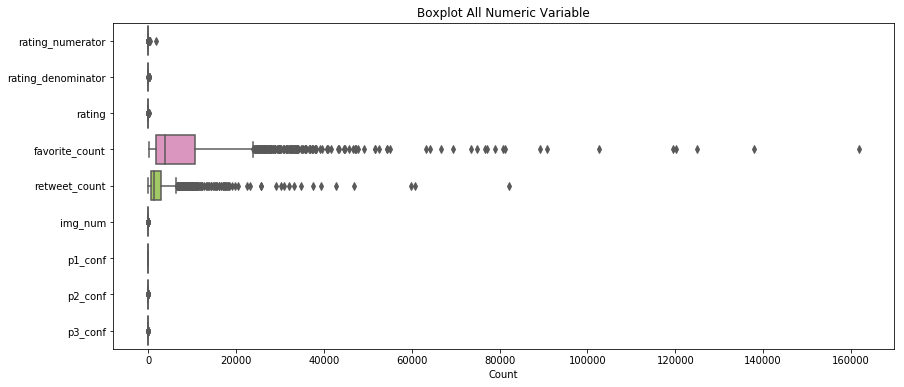

In [124]:
# visualitation
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.boxplot(data=twitter_df[['rating_numerator','rating_denominator','rating','favorite_count',\
                                  'retweet_count','img_num','p1_conf','p2_conf','p3_conf']],\
                 orient="h", palette="Set2", ax=ax);
plt.title('Boxplot All Numeric Variable');
plt.xlabel('Count');
plt.savefig('plot/1_Boxplot All Numeric Variable.png')

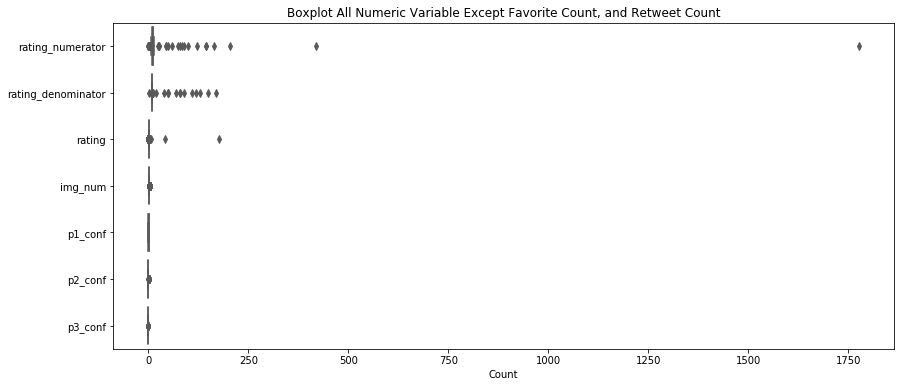

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.boxplot(data=twitter_df[['rating_numerator','rating_denominator','rating',\
                                  'img_num','p1_conf','p2_conf','p3_conf']],\
                 orient="h", palette="Set2", ax=ax);
plt.title('Boxplot All Numeric Variable Except Favorite Count, and Retweet Count');
plt.xlabel('Count');
plt.savefig('plot/2_Boxplot All Numeric Variable Except Favorite Count, and Retweet Count.png')

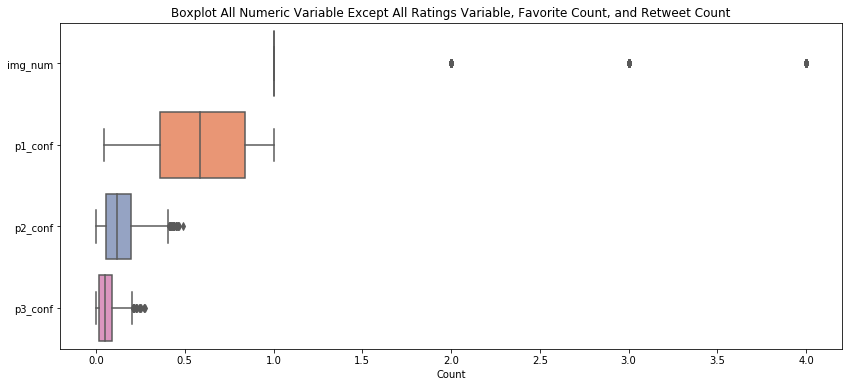

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.boxplot(data=twitter_df[['img_num','p1_conf','p2_conf','p3_conf']],\
                 orient="h", palette="Set2", ax=ax);
plt.title('Boxplot All Numeric Variable Except All Ratings Variable, Favorite Count, and Retweet Count');
plt.xlabel('Count');
plt.savefig('plot/3_Boxplot All Numeric Variable Except All Ratings Variable, Favorite Count, and Retweet Count.png')

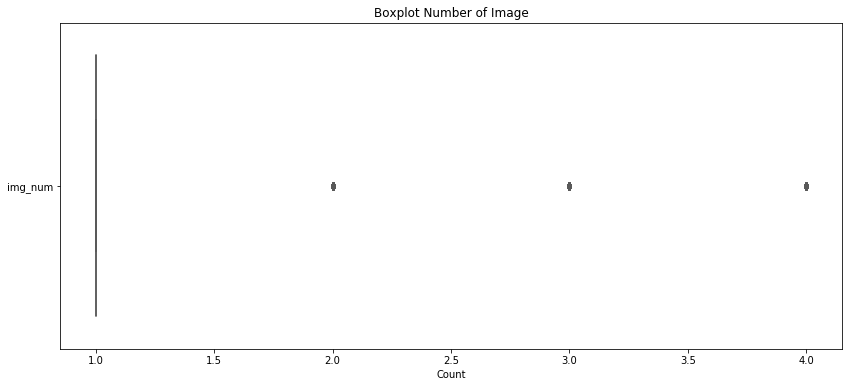

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.boxplot(data=twitter_df[['img_num']],\
                 orient="h", palette="Set2", ax=ax);
plt.title('Boxplot Number of Image');
plt.xlabel('Count');
plt.savefig('plot/4_Boxplot Number of Image.png')

<a id="q1"></a>
##### 1. Are there any outlier in the data?
<br>
<b> Answer:</b> 
<br>
- In numeric data, all cols have outlier except p1_conf and rating_denominator. Just like the information from udacity, some they use unique rating so the result maybe not between 0 until 1.
<br>
- From statistic description, we found that distance min max from variables rating_numerator, rating_denominator, favorite_count, retweet_count, and ratings are high. But for all rating variable, we can find that Q3 is not too far from another Q, so the max value from that variables definitely outlier.
<br>
- In img_num just like the stat desc, the min until Q3 the result are 1, so the other value except 1 was missing value 

This plot for question number 2:

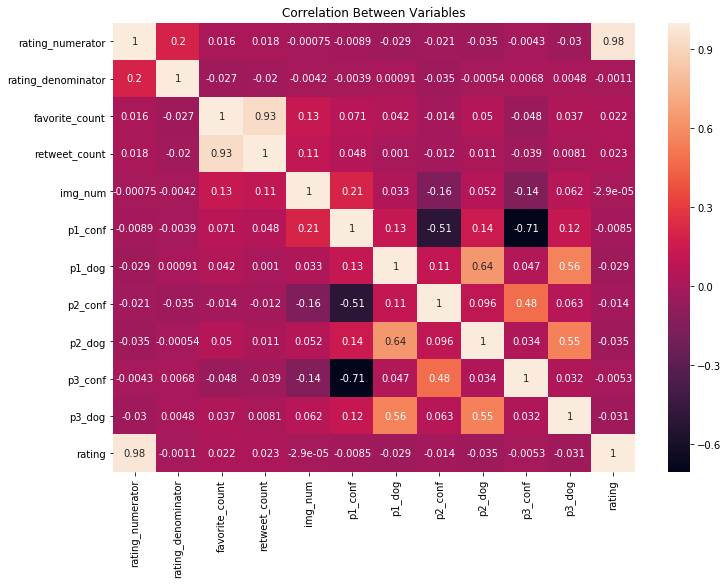

In [128]:
# correlation
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(twitter_df.corr(), annot=True, ax=ax);
plt.title('Correlation Between Variables');
plt.savefig('plot/5_Correlation Between Variables.png')

<a id="q2"></a>
##### 2. How about correlation between variables?
<br>
<b> Answer:</b>
<br><i>Note: The correlation value between -1 until 1, negative just to make we know the correlation direction, the closer to the value 0, the smaller the correlation. It use pearson correlation so they just see the linear relationship between each variables.
<br></i>
<br>
- To this plot please ignore correlation between rating and rating_numerator or rating_denominator because the result  should be strong because rating is a calculation from both of them. But surprisingly the correlation between rating and rating_denominator is small. The answer can be found from stat desc that show if value rating_numerator is more varied than rating_denominator (std rating_denominator more hight than rating_numerator but their quantiles just similar each other)
<br>
- We can see hight positive correlation between favorite_count and retweet_count. Its mean the more favorited the more retweeted
<br>
- The correlation between all confidence variables also quite high. Somehow when p1_conf hight the confidence in p2 and p3 will decreese, but when confidence p3 increase the confidence in p2 will lightly increese.

This plot for question number 3:

In [101]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

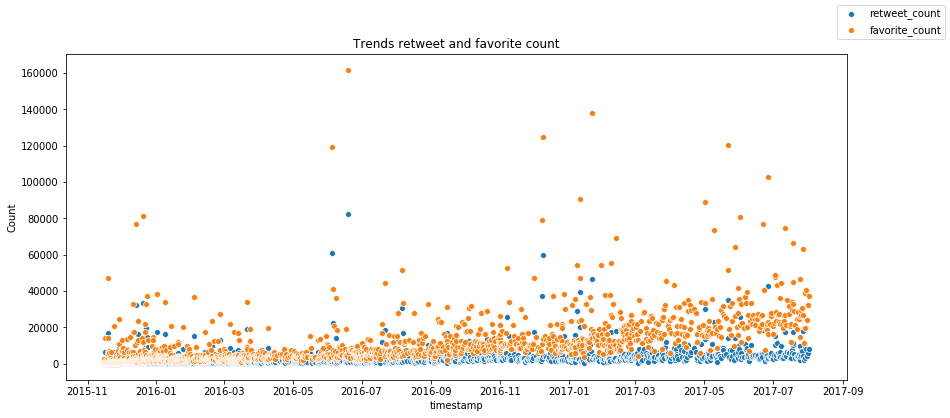

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.scatterplot(x="timestamp", y="retweet_count", data=twitter_df,ax=ax);
sns.scatterplot(x="timestamp", y="favorite_count", data=twitter_df,ax=ax);
fig.legend(labels=['retweet_count','favorite_count']);
plt.title('Trends retweet and favorite count');
plt.ylabel('Count');
plt.savefig('plot/6_Trends retweet and favorite count.png')

<a id="q3"></a>
##### 3. Does the retweet count and favorite count increase with time?
<br>
<b> Answer:</b>
From that visualization, favorite count and retweet count always increase with time. The trends are increasing for both variables. But favorite count growing large than retweet count

This plot for question number 4:

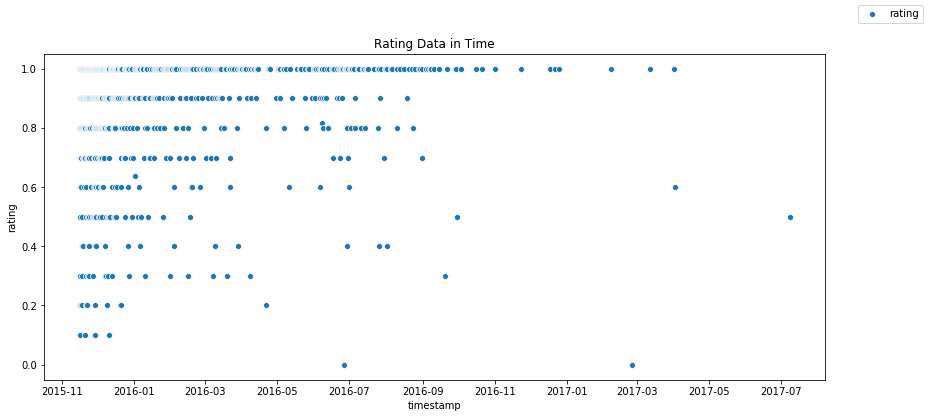

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.scatterplot(x="timestamp", y="rating", data=twitter_df.query('rating<=1'),ax=ax);
fig.legend(labels=['rating']);
plt.title('Rating Data in Time');
plt.savefig('plot/7_Rating Data in Time.png')

<a id="q4"></a>
##### 4. Does the rating increase with time?
<br>
<b> Answer:</b>
Rating are sparated from min to max value in anytime, but from that plot from same date the rating are missing because the data was missing. Just like the correlation that rating didn't correlate with any variables.


This plot for question number 5:

In [104]:
# frist let make rating level
# this function will help to make level from quantile and return categories column
def get_class(df, column:str):
    # find quantile to decide that class
    min_value = df[column].min()
    quantile_1 = df[column].describe()[4]
    quantile_2 = df[column].describe()[5]
    quantile_3 = df[column].describe()[6]
    max_value = df[column].max()
    
    # bin edges that will be used to "cut" the data into groups
    bin_level = [ min_value, quantile_1, quantile_2, quantile_3, max_value]
    # labels for the four budget level groups
    bin_name = [ 'Low', 'Medium', 'High', 'Very High'] 
    # creates budget_levels column
    name = '{}_levels'.format(column)
    df[name] = pd.cut(df[column], bin_level, labels=bin_name, include_lowest = True)
    return df

In [105]:
rank_level_df = get_class(twitter_df, "rating")
rank_level_df = rank_level_df[['favorite_count','retweet_count','rating_levels']]
rank_level_df.head(3)

,favorite_count,retweet_count,rating_levels
0,2498,493,Low
1,124,46,Low
2,120,43,Low


In [106]:
rank_level_df = rank_level_df.groupby(['rating_levels']).sum()
rank_level_df

,favorite_count,retweet_count
rating_levels,,
Low,2758092,982300
Medium,2576783,810977
High,4822289,1297031
Very High,6679990,2006943


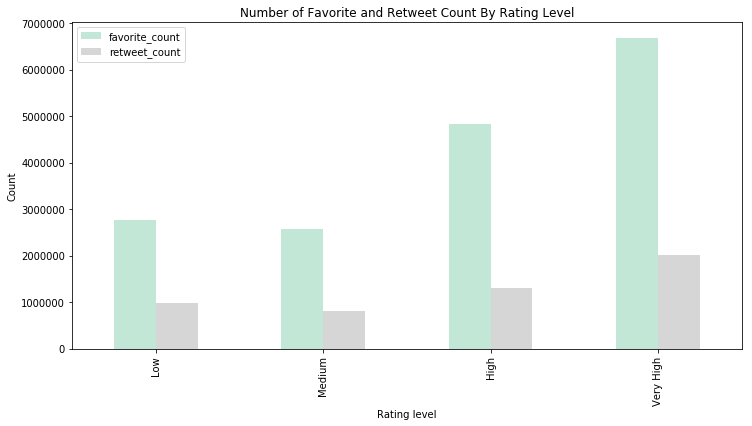

In [131]:
rank_level_df.plot(kind='bar',figsize=(12, 6),colormap='Pastel2',alpha=0.8).legend(loc='upper left');
plt.xlabel('Rating level');
plt.ylabel('Count');
plt.title('Number of Favorite and Retweet Count By Rating Level');
plt.savefig('plot/8_Number of Favorite and Retweet Count By Rating Level.png')

<a id="q5"></a>
##### 5. Are the rating affect with the number of favorite and retweet count?
<br>
<b> Answer:</b>
From all data, we found that the higher the rating the higher the count (favorite and retweet). From that plot we also know that count in favorite alway higher than retweet.

This plot for question number 6:

In [108]:
count = pd.DataFrame()
count['p1_dog'] = twitter_df.p1_dog.value_counts()
count['p2_dog'] = twitter_df.p2_dog.value_counts()
count['p3_dog'] = twitter_df.p3_dog.value_counts()
count

,p1_dog,p2_dog,p3_dog
True,1462,1481,1433
False,516,497,545


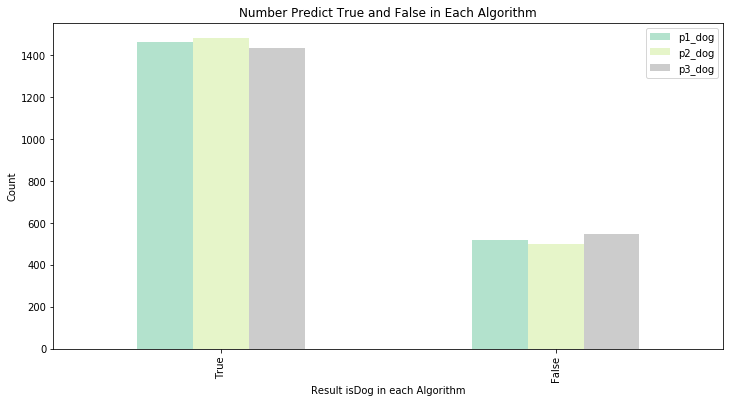

In [132]:
count.plot.bar(colormap='Pastel2',figsize=(12, 6));
plt.xlabel('Result isDog in each Algorithm');
plt.ylabel('Count');
plt.title('Number Predict True and False in Each Algorithm');
plt.savefig('plot/9_Number Predict True and False in Each Algorithm.png')

<a id="q6"></a>
##### 6. How much each algorithm predict the picture is dog?
<br>
<b> Answer:</b>
P2 predict picture dog large than p1 and p3. The smallest predicted is dog come from p3.

This plot for question number 7:

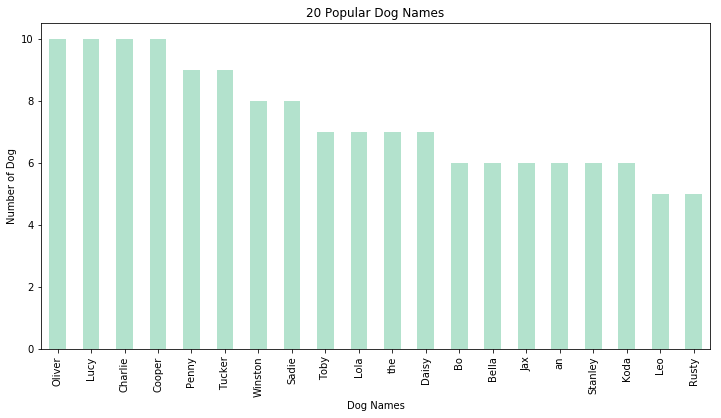

In [133]:
twitter_df.name.value_counts()[0:20].plot.bar(colormap='Pastel2',figsize=(12, 6));
plt.xlabel('Dog Names');
plt.ylabel('Number of Dog');
plt.title('20 Popular Dog Names');
plt.savefig('plot/10_20 Popular Dog Names.png')

<a id="q7"></a>
##### 7. What are the most popular dog names?
<br>
<b> Answer:</b>
"Oliver", "Lucy", "Charlie", and "Cooper" is the commond dog names in that table.

This plot for question number 8:

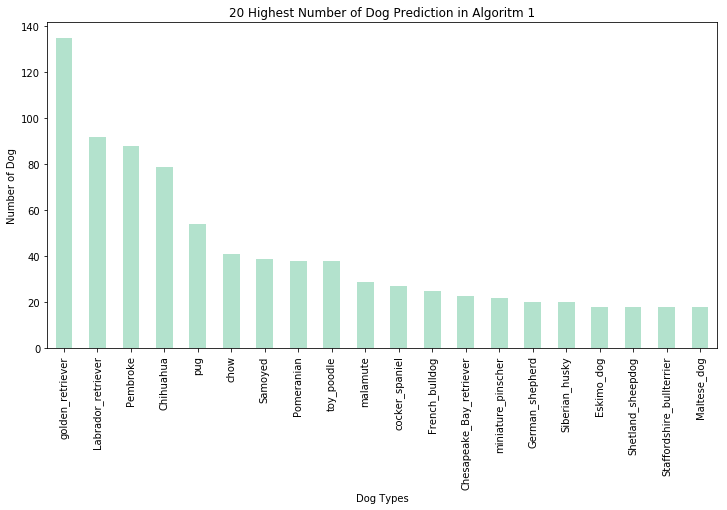

In [134]:
twitter_df[twitter_df.p1_dog == True].p1.value_counts()[0:20].plot.bar(colormap='Pastel2',figsize=(12, 6));
plt.xlabel('Dog Types');
plt.ylabel('Number of Dog');
plt.title('20 Highest Number of Dog Prediction in Algoritm 1');
plt.savefig('plot/11_20 Highest Number of Dog Prediction in Algoritm 1.png')

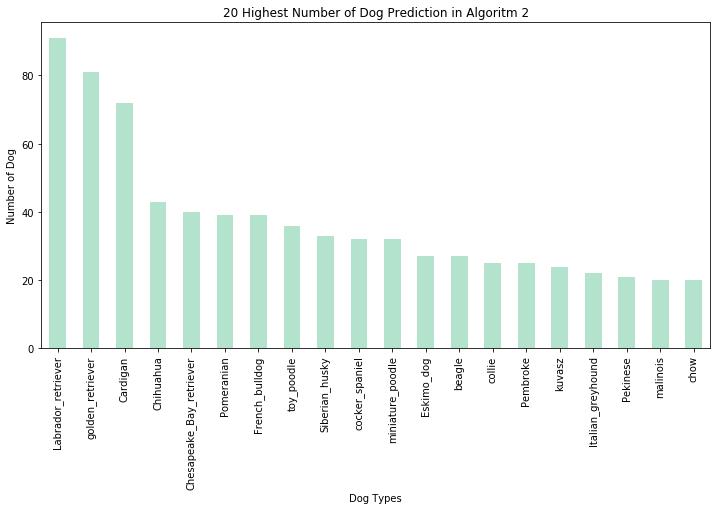

In [135]:
twitter_df[twitter_df.p2_dog == True].p2.value_counts()[0:20].plot.bar(colormap='Pastel2',figsize=(12, 6));
plt.xlabel('Dog Types');
plt.ylabel('Number of Dog');
plt.title('20 Highest Number of Dog Prediction in Algoritm 2');
plt.savefig('plot/12_20 Highest Number of Dog Prediction in Algoritm 2.png')

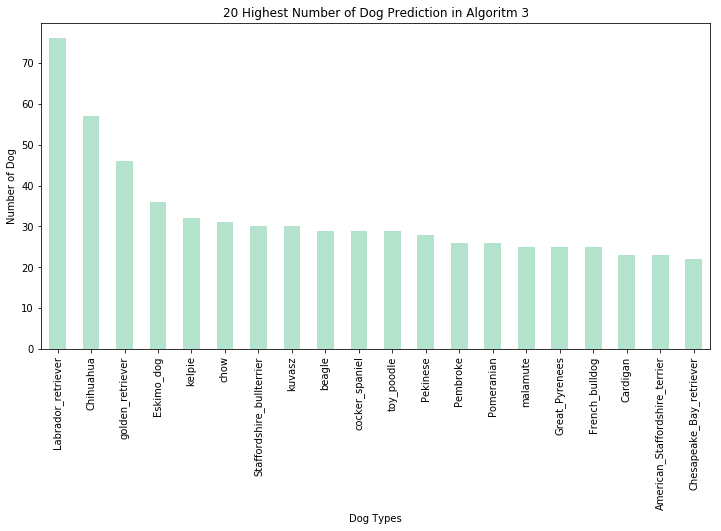

In [136]:
twitter_df[twitter_df.p3_dog == True].p3.value_counts()[0:20].plot.bar(colormap='Pastel2',figsize=(12, 6));
plt.xlabel('Dog Types');
plt.ylabel('Number of Dog');
plt.title('20 Highest Number of Dog Prediction in Algoritm 3');
plt.savefig('plot/12_20 Highest Number of Dog Prediction in Algoritm 3.png')

<a id="q8"></a>
##### 8. What are the most popular dog predict?
<br>
<b> Answer:</b>
In Algorithm 1, golden retriever are the most popular dog, but in Algorithm 2 and 3, labrator retriever is the most popular dog. 

This code for answer question number 9:

In [114]:
top_dog = twitter_df.query('(p1 == p2) | (p2 == p3) | (p1 == p3)')
top_dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_levels
1390,770414278348247044,2016-08-30 00:14:12+00:00,Twitter for iPhone,Meet Al Cabone. He's a gangsta puppa. Rather h...,https://twitter.com/dog_rates/status/770414278...,11,10,Al,NaN,6586,...,0.580528,False,maillot,0.081449,False,golden_retriever,0.05357,True,1.1,Medium


<a id="q9"></a>
##### 9. What are the most popular dog predict when all algorithm predict the same dog?
<br>
<b> Answer:</b>
When I select data with same answer in at least 2 Algorithm, there are just 1 data that predict type, that is mailot and exist in algorithm 1 and 2.

<a id="prediction"></a>
# Predict dog_stage

Because dog_stage have many missing value, so I try to predict them with simple decision tree model.
Todo:
<ol>
<li><a href="#p1">Make sure the type of our table</a></li>
<li><a href="#p2">Define X and Y as predictor and label</a></li>
<li><a href="#p3">Encode categorical predictor</a></li>
<li><a href="#p4">Split train, and test data</a></li>
<li><a href="#p5">Make prediction</a></li>
<li><a href="#p6">Show Metrics from prediction</a></li>
</ol>
    
<a href="#pred">The predictions</a>

<a id="p1"></a>
1.Make sure the type of our table

In [176]:
# because rating_levels from analyzing data have categorical datatype, 
# so we must parse it to object (just like another columns)
twitter_df.rating_levels = twitter_df.rating_levels.astype("object")
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 24 columns):
tweet_id              1978 non-null object
timestamp             1978 non-null object
source                1978 non-null object
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null int64
rating_denominator    1978 non-null int64
name                  1383 non-null object
dog_stage             294 non-null object
favorite_count        1978 non-null int64
retweet_count         1978 non-null int64
jpg_url               1978 non-null object
img_num               1978 non-null int64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null bool
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null bool
p3                    1978 non-null object
p3_conf               1978 non-null float

<a id="p2"></a>
2. Define X and Y as predictor and label

In [288]:
# I use data with not na in dog stage tobe my dataset in my models
dataset = twitter_df[pd.notna(twitter_df.dog_stage)]
dataset.dog_stage.value_counts()

pupper     203
doggo       62
puppo       22
floofer      7
Name: dog_stage, dtype: int64

Because of imbalance data, I decide to upsampling the other label into 203 data just like 'puuper'

In [296]:
def rand_sampling_dog_stage(query, n:int, dataFrame):
    col_df = dataFrame.query(query)
    return col_df.sample(n = n, replace=True, random_state=9835)

In [305]:
new_dataset = pd.DataFrame()
new_dataset = pd.concat([dataset.query('dog_stage == "pupper"'),\
                       rand_sampling_dog_stage('dog_stage == "doggo"', 203,dataset),\
                       rand_sampling_dog_stage('dog_stage == "puppo"', 203,dataset),\
                       rand_sampling_dog_stage('dog_stage == "floofer"', 203,dataset)])
new_dataset.dog_stage.value_counts()

floofer    203
doggo      203
pupper     203
puppo      203
Name: dog_stage, dtype: int64

In [307]:
# define predictor and label

Y = new_dataset.dog_stage
X = new_dataset.drop(['dog_stage','timestamp','tweet_id','expanded_urls','jpg_url'], axis = 1)

<a id="p3"></a>
3. Encode categorical predictor

In [308]:
# Make mask for categorical dtypes only
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [309]:
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object to help us encode each variable
le = LabelEncoder()

In [310]:
# Our categorical variable
categorical_cols

['source', 'text', 'name', 'p1', 'p2', 'p3', 'rating_levels']

In [311]:
# apply our le to categorical feature columns

X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
X[categorical_cols].head(10)

,source,text,name,p1,p2,p3,rating_levels
331,2,140,21,107,14,28,1
333,2,214,107,62,63,121,1
339,2,228,124,107,14,33,2
346,2,111,70,6,61,44,0
353,2,93,135,20,26,0,1
356,2,208,102,117,73,127,1
357,2,264,164,76,20,77,0
363,2,143,26,97,51,110,2
367,2,144,27,89,111,81,1
368,2,147,29,107,7,20,1


<a id="p4"></a>
4. Split train, and test data

In [312]:
from sklearn.model_selection import train_test_split

# split sratify so all lebel is balance, use 30% data to be our data test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 9835)

In [313]:
# label in data train
y_train.value_counts()

pupper     142
floofer    142
doggo      142
puppo      142
Name: dog_stage, dtype: int64

In [314]:
# label in data test
y_test.value_counts()

pupper     61
floofer    61
doggo      61
puppo      61
Name: dog_stage, dtype: int64

<a id="p5"></a>
5. Make prediction

In [315]:
from sklearn.tree import DecisionTreeClassifier

# Make classifier object, in there I use gini 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 9835) 

# Train the model
clf_gini.fit(X_train, y_train) 

# Predict with test sample
y_pred = clf_gini.predict(X_test)

<a id="p6"></a>
6. Show Metrics from prediction

In [316]:
f1_score(y_test, y_pred, average='macro')

0.9103535806544202

In [317]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

print("Confusion Matrix:\n", 
confusion_matrix(y_test, y_pred)) 

print ("Accuracy:\n", 
accuracy_score(y_test,y_pred)*100) 

print("Report:\n", 
classification_report(y_test, y_pred)) 

Confusion Matrix:
 [[59  0  1  1]
 [ 0 61  0  0]
 [14  0 42  5]
 [ 0  0  0 61]]
Accuracy:
 91.39344262295081
Report:
               precision    recall  f1-score   support

       doggo       0.81      0.97      0.88        61
     floofer       1.00      1.00      1.00        61
      pupper       0.98      0.69      0.81        61
       puppo       0.91      1.00      0.95        61

   micro avg       0.91      0.91      0.91       244
   macro avg       0.92      0.91      0.91       244
weighted avg       0.92      0.91      0.91       244



<a id='pred'></a>
Because the metrics are good enough, so let's predict another row

In [343]:
# get the data
data_predict = twitter_df.copy()
data_predict.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_levels
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,2498,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.8,Low
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,124,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.7,Low


In [344]:
# encode the data
data_predict[categorical_cols] = data_predict[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
data_predict[categorical_cols].head(10)

,source,text,name,p1,p2,p3,rating_levels
0,2,174,919,77,149,73,1
1,2,1801,919,287,253,66,1
2,2,164,919,32,246,120,1
3,2,1792,919,60,304,257,1
4,2,171,919,243,63,25,1
5,2,1799,919,13,27,41,1
6,2,1810,910,119,263,365,1
7,2,158,919,137,75,194,1
8,2,530,919,304,319,200,1
9,2,166,926,244,230,345,1


In [345]:
# make prediction
data_predict.loc[:,'dog_stage'] = clf_gini.predict(data_predict.drop(['dog_stage','timestamp','tweet_id','expanded_urls','jpg_url'], axis = 1))
data_predict.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_levels
0,666020888022790149,2015-11-15 22:32:08+00:00,2,174,https://twitter.com/dog_rates/status/666020888...,8,10,919,pupper,2498,...,0.465074,True,149,0.156665,True,73,0.061428,True,0.8,1
1,666029285002620928,2015-11-15 23:05:30+00:00,2,1801,https://twitter.com/dog_rates/status/666029285...,7,10,919,pupper,124,...,0.506826,True,253,0.074192,True,66,0.072010,True,0.7,1
2,666033412701032449,2015-11-15 23:21:54+00:00,2,164,https://twitter.com/dog_rates/status/666033412...,9,10,919,pupper,120,...,0.596461,True,246,0.138584,True,120,0.116197,True,0.9,1
3,666044226329800704,2015-11-16 00:04:52+00:00,2,1792,https://twitter.com/dog_rates/status/666044226...,6,10,919,pupper,288,...,0.408143,True,304,0.360687,True,257,0.222752,True,0.6,1
4,666049248165822465,2015-11-16 00:24:50+00:00,2,171,https://twitter.com/dog_rates/status/666049248...,5,10,919,pupper,104,...,0.560311,True,63,0.243682,True,25,0.154629,True,0.5,1


In [346]:
# let's make their into 1 table

# change col name so it will not be duplicated
data_predict = data_predict[['tweet_id','dog_stage']]
data_predict.columns =["tweet_id", "predict_dog_stage"]
data_predict.head()

,tweet_id,predict_dog_stage
0,666020888022790149,pupper
1,666029285002620928,pupper
2,666033412701032449,pupper
3,666044226329800704,pupper
4,666049248165822465,pupper


In [347]:
# join table
twitter_predict_df = pd.merge(twitter_df, data_predict, how = 'inner', on = ['tweet_id'])
twitter_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 25 columns):
tweet_id              1978 non-null object
timestamp             1978 non-null object
source                1978 non-null object
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null int64
rating_denominator    1978 non-null int64
name                  1383 non-null object
dog_stage             294 non-null object
favorite_count        1978 non-null int64
retweet_count         1978 non-null int64
jpg_url               1978 non-null object
img_num               1978 non-null int64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null bool
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null bool
p3                    1978 non-null object
p3_conf               1978 non-null float

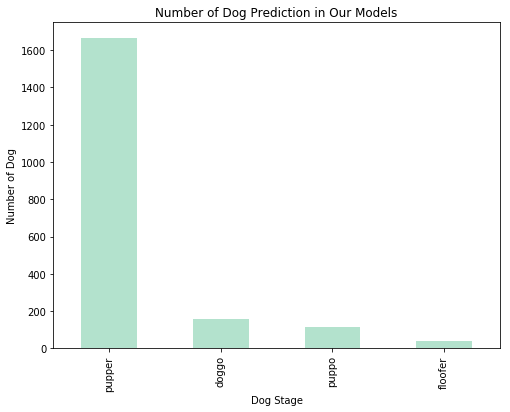

In [353]:
twitter_predict_df.predict_dog_stage.value_counts()[0:20].plot.bar(colormap='Pastel2',figsize=(8, 6));
plt.xlabel('Dog Stage');
plt.ylabel('Number of Dog');
plt.title('Number of Dog Prediction in Our Models');
plt.savefig('plot/13_Number of Dog Prediction in Our Models');

Just like the value before uppersampling, the popular dog_stage is pupper.

In [355]:
# save the prediction dataframe
twitter_predict_df.to_csv('data_generated/twitter_predict_df.csv',index=False)